# Hypothesis Testing Case Study

### importing the labraries and packages

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import scipy.stats as stats
# for good vis--
plt.style.use('ggplot')

## Business Problem_1

In [96]:
loan = pd.read_csv("LoansData.csv")
loan.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [97]:
# data analyse
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [98]:
loan.isnull().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [99]:
loan.columns = loan.columns.str.replace('.','_')

In [100]:
loan.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [101]:
loan.Interest_Rate = loan.Interest_Rate.str.replace('%',' ').apply(pd.to_numeric)
loan.Debt_To_Income_Ratio = loan.Debt_To_Income_Ratio.str.replace('%',' ').apply(pd.to_numeric)

In [102]:
loan.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [103]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   float64
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [104]:
loan.describe()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
count,2499.000000,2499.000000,2498.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,12405.462185,12002.374186,13.065388,15.380420,5688.931321,10.072887,15223.184622,0.906688
std,7802.933666,7746.767348,4.177201,7.505052,3963.118185,4.507416,18281.015258,1.231149
min,1000.000000,-0.010000,5.420000,0.000000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,10.160000,9.750000,3500.000000,7.000000,5584.000000,0.000000
50%,10000.000000,10000.000000,13.110000,15.320000,5000.000000,9.000000,10948.000000,0.000000
75%,17000.000000,16000.000000,15.800000,20.675000,6800.000000,13.000000,18861.000000,1.000000
max,35000.000000,35000.000000,24.890000,34.910000,102750.000000,38.000000,270800.000000,9.000000


In [105]:
# drop Employment_Length columns because its give a lot nullvalue and its columns is not required

loan = loan.drop(columns='Employment_Length')

In [106]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   float64
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [107]:
loan = loan.dropna()

In [108]:
loan.isnull().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
dtype: int64

In [109]:
loan['FICO_Score']=((loan.FICO_Range.str[0:3].astype(int))+(loan.FICO_Range.str[4:].astype(int)))/2

### a. Interest rate is varied for different loan amounts ( less interest charged for high loan amounts)

In [110]:
stats.pearsonr(loan.Interest_Rate,loan.Amount_Funded_By_Investors)


(0.3358194064278588, 1.1396807200473959e-66)

###### p-value 1.1396807200473959e-66 is less then 0.5 , so we can reject null hypothesis  and accept  alternate hypothesis. that's why different loan amounts have different interest rates with 95% CI.

### b. Loan length is directly effecting  interest rate.

In [111]:
loan.Loan_Length.value_counts()

36 months    1941
60 months     548
Name: Loan_Length, dtype: int64

In [112]:
length_36months = loan.query('Loan_Length == "36 months"').Interest_Rate
length_60months = loan.query('Loan_Length == "60 months"').Interest_Rate

In [113]:
length_36months.mean()

12.128907779495213

In [114]:
length_60months.mean()

16.40746350364961

In [115]:
stats.ttest_ind(length_60months,length_36months)

Ttest_indResult(statistic=23.37963620691779, pvalue=1.9132344351585912e-109)

###### p-value 1.9132344351585912e-109 is less then 0.5 , so we can reject null hypothesis and accept alternate hypotheses. as per based on 95% CI. that's why interest rate are impacted by loan length

### c. Interest rate varies for different purpose of loans 

In [116]:
loan.Loan_Purpose.value_counts()

debt_consolidation    1301
credit_card            443
other                  199
home_improvement       152
major_purchase         101
small_business          86
car                     50
wedding                 38
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [117]:
debt_consolidation=loan.query('Loan_Purpose=="debt_consolidation"').Interest_Rate
credit_card=loan.query('Loan_Purpose=="credit_card"').Interest_Rate
other=loan.query('Loan_Purpose=="other"').Interest_Rate
home_improvement=loan.query('Loan_Purpose=="home_improvement"').Interest_Rate
major_purchase=loan.query('Loan_Purpose=="major_purchase"').Interest_Rate
small_business=loan.query('Loan_Purpose=="small_business"').Interest_Rate            
car=loan.query('Loan_Purpose=="car"').Interest_Rate
wedding=loan.query('Loan_Purpose=="wedding"').Interest_Rate
medical=loan.query('Loan_Purpose=="medical"').Interest_Rate
moving=loan.query('Loan_Purpose=="moving"').Interest_Rate
vacation=loan.query('Loan_Purpose=="vacation"').Interest_Rate
house=loan.query('Loan_Purpose=="house"').Interest_Rate
educational=loan.query('Loan_Purpose=="educational"').Interest_Rate
renewable_energy=loan.query('Loan_Purpose=="renewable_energy"').Interest_Rate 

In [118]:
stats.f_oneway(debt_consolidation,credit_card,other,home_improvement,major_purchase,
               small_business,car,wedding,medical,moving,vacation,house,educational,renewable_energy)

F_onewayResult(statistic=7.487175499510107, pvalue=1.1346364693350775e-14)

###### p-value 1.1346364693350775e-14 is less then 0.5 , so we can reject null hypothesis and accept alternate hypotheses. as per based on 95% CI. so interest rates vary for loans of different purposes.

### d. There is relationship between FICO scores and Home Ownership. it  means that, People with owning home will have high FICO scores.

In [119]:
loan.Home_Ownership.value_counts()

MORTGAGE    1144
RENT        1140
OWN          200
OTHER          5
Name: Home_Ownership, dtype: int64

In [120]:
MORTGAGE=loan.query('Home_Ownership=="MORTGAGE"').FICO_Score
RENT=loan.query('Home_Ownership=="RENT"').FICO_Score
OWN=loan.query('Home_Ownership=="OWN"').FICO_Score            
OTHER=loan.query('Home_Ownership=="OTHER"').FICO_Score

In [121]:
stats.f_oneway(MORTGAGE,RENT,OWN,OTHER)

F_onewayResult(statistic=23.067768208374645, pvalue=1.001016973422469e-14)

###### p-value 1.001016973422469e-14 is less then 0.5 , so we can reject null hypothesis and accept alternate hypotheses. as per based on 95% CI. FICO scores are related to home Ownership

## Business Problem_2

In [122]:
price_Quotes = pd.read_csv("Price_Quotes.csv")
price_Quotes.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [123]:
price_Quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


### There is any difference in the average price quotes provided by mary and berry

In [124]:
price_Quotes.Barry_Price.mean()

124.33333333333333

In [125]:
price_Quotes.Mary_Price.mean()

114.75

In [126]:
stats.ttest_ind(price_Quotes.Mary_Price,price_Quotes.Barry_Price)

Ttest_indResult(statistic=-1.4147436739281787, pvalue=0.17114226132118285)

###### p-value 0.17114226132118285 is greater then 0.5 , so accept null hypothesis as per based on 95% CI.  so we cannot say  there  is any difference between mary and barry's average price_quotes.

## Business Problem_3

In [127]:
data = pd.read_csv("Treatment_Facility.csv")
data.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [129]:
data = data.rename(columns={'VAR4':"TRFF","VAR5":"CI"})

In [130]:
data

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


###  Determine what effect, if any the reengineering effort had on the incidence behavioral problems and staff turnover. i.e to determine if the  reengineering effort  changed the critical incidence rate. is there evidence that the critical incidence rate improved?

In [131]:
prior_turnover = data.query('Reengineer == "Prior"').Employee_Turnover

In [132]:
post_turnover = data.query('Reengineer == "Post"').Employee_Turnover

In [133]:
stats.ttest_ind(prior_turnover,post_turnover)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

###### p-value 0.09361109345535304  is greater than 0.05 , so accept null hypothesis as per based on 95% CI(confidence interval).  we can't say that there is effect in staff turnover with in this data.

In [134]:
prior_CI = data.query('Reengineer == "Prior"').CI

In [135]:
post_CI = data.query('Reengineer == "Post"').CI

In [136]:
stats.ttest_ind(prior_CI,post_CI)

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

###### p-value 0.12091989189884149 is greater than 0.05 , so accept null hypothesis as per based on 95% confidence interval. we can't say that reegineering effort changed  the critical incidence rate with in this data.

## Business Problem_4

In [137]:
# import the dataset
priority = pd.read_csv("Priority_Assessment.csv")
priority.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [138]:
priority.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


### We will focus on the prioritization system. if the system is working , then high priority jobs, on average, should  be completed more quickly than medium priority jobs, and medium prisority jobs should be completed more quickly than low priority. Use the data provided to deteremine whether this is , in fact occuring.

In [139]:
high_priority = priority.query('Priority == "High"').Days

In [140]:
medium_priority = priority.query("Priority == 'Medium'").Days

In [141]:
low_priority = priority.query("Priority == 'Low'").Days

In [142]:
stats.f_oneway(high_priority,medium_priority,low_priority)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

###### p-value 0.16411459461716182 is greater than 0.05 , so acciept null hypothesis as per based on 95% confidence interval.  we can't say that High priority jobs  are completed  more quickly  than medium priority jobs, and medium priority jobs are completed more quickly than low priority jobs with the help of in this data.

## Business Problems_5

In [143]:
Films = pd.read_csv("Films.csv")
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [144]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [145]:
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [146]:
# data prep....
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [147]:
Films.Gender = np.where((Films.Gender == 'Male') | (Films.Gender == '1'), 'Male','Female')

In [148]:
Films.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [149]:
Films.Marital_Status = np.where((Films.Marital_Status == 'Married') | (Films.Marital_Status == '1') , "Married" ,"Single")

In [150]:
for i in Films.columns:
    Films[i] = Films[i].fillna(Films[i].mode()[0])
    

In [151]:
Films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

### What is the overall level of customer satification ?

In [152]:
mean = Films.Overall.mean()
mean

1.621212121212121

In [153]:
std = Films.Overall.std()
std

0.6878262202585181

In [154]:
SE = std / (np.sqrt(Films.shape[0]))
SE

0.037863587260422576

In [155]:
# satification range
x = mean-(1.96 * SE)
y = mean+(1.96 * SE)
print("In 95% confidence interval, the overall level of customer satification will be in the range = ",x," to ",y)

In 95% confidence interval, the overall level of customer satification will be in the range =  1.5469994901816928  to  1.6954247522425494


### What factor are linked to satification ?

In [156]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [157]:
# factor_1
Films.Movie.value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [158]:
Willy_Wonka = Films.query('Movie == "Willy Wonka"').Overall
Ferris_Buellers_Day_Off = Films.query('Movie == "Ferris Buellers Day Off"').Overall
Old_School = Films.query('Movie == "Old School"').Overall

In [159]:
stats.f_oneway(Willy_Wonka,Ferris_Buellers_Day_Off,Old_School)

F_onewayResult(statistic=1.335243752886233, pvalue=0.2645245972839759)

###### p-value 0.2645245972839759 is greater than 0.05, so accept null hypothesis as per based on 95% confidence interval. we can't say that movie is a factor linked to satisfaction with in this data. 

In [160]:
# factor_2
Films.Gender.value_counts()

Female    213
Male      117
Name: Gender, dtype: int64

In [161]:
Male = Films.query('Gender == "Male"').Overall
Female = Films.query('Gender == "Female"').Overall

In [162]:
stats.ttest_ind(Male,Female)

Ttest_indResult(statistic=1.3936216696742263, pvalue=0.1643754193211279)

###### p-value 0.1643754193211279 is greater than 0.05 , so accept null hypothesis as per based on 95% confidence interval. we can't say that Gender is a factor to satisfaction with in this data.

In [163]:
# factor_3
Films.Marital_Status.value_counts()

Single     230
Married    100
Name: Marital_Status, dtype: int64

In [164]:
Single = Films.query('Marital_Status == "Single"').Overall
Married = Films.query('Marital_Status == "Married"').Overall

In [165]:
stats.ttest_ind(Single,Married)

Ttest_indResult(statistic=0.7171640309514444, pvalue=0.47378328196635067)

###### p-value 0.47378328196635067 is greater than 0.05, so accept null hypothesis as per based on 95% confidence interval. we can't say that Marital_Status is a factor to satisfaction with in this data.

In [166]:
# factor_4
Films.Sinage.value_counts()

2.0    158
1.0    113
3.0     48
4.0      6
5.0      5
Name: Sinage, dtype: int64

In [167]:
stats.pearsonr(Films.Sinage,Films.Overall)

(0.3821028042239567, 6.501065434766499e-13)

###### p-value 6.501065434766499e-13 is less than 0.5 , so we can reject null hypothesis and accept alternate hypothesis . as per based on 95% confidence interval , we can say that Sinage is a factor to satisfaction with in this data.

In [168]:
# factor_5
Films.Parking.value_counts()

2.0    155
1.0    135
3.0     29
4.0      7
5.0      4
Name: Parking, dtype: int64

In [169]:
stats.pearsonr(Films.Parking,Films.Overall)

(0.5144289487855271, 1.0840276087789895e-23)

###### p-value 1.0840276087789895e-23 is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis , as per based on 95% confidence interval , we can say that Parking is a factor to satisfaction with in this data.

In [170]:
# factor_6
Films.Clean.value_counts()

2.0    155
1.0    144
3.0     24
4.0      5
5.0      2
Name: Clean, dtype: int64

In [171]:
stats.pearsonr(Films.Clean,Films.Overall)

(0.35082227890709217, 5.437550007439627e-11)

###### p-value 5.437550007439627e-11 is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis , as per based on 95% confidence interval , we can say that Clean is a factor to satisfaction with in this data.

In [172]:
# factor_7
Films.Age.value_counts()

2.0    177
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

In [173]:
one = Films.query('Age == 1').Overall
two = Films.query('Age == 2').Overall
three = Films.query('Age == 3').Overall
four = Films.query('Age == 4').Overall

In [174]:
stats.f_oneway(one,two,three,four)

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872579)

###### p-value 0.3816737451872579 is greater than 0.05 , so accept null hypothesis as per based on 95% confidence interval, we can't say that Age is a factor to satisfaction with in this data.

In [175]:
# factor_8
Films.Income.value_counts()

1.0    158
3.0     90
2.0     82
Name: Income, dtype: int64

In [176]:
income1 = Films.query('Income == 1').Overall
income2 = Films.query('Income == 2').Overall
income3 = Films.query("Income == 3").Overall

In [177]:
stats.f_oneway(income1,income2,income3)

F_onewayResult(statistic=0.16488481054397225, pvalue=0.8480618362664597)

###### p-value 0.8480618362664597 is greater than 0.05 , so accept null hypothesis as per based on 95% confidence interval , we can't say that Income to satisfaction with in this data.

In [178]:
# factor_9
Films.Hear_About.value_counts()

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [179]:
Hear_About_5=Films.query('Hear_About=="5"').Overall
Hear_About_4=Films.query('Hear_About=="4"').Overall
Hear_About_3=Films.query('Hear_About=="3"').Overall
Hear_About_2=Films.query('Hear_About=="2"').Overall
Hear_About_1=Films.query('Hear_About=="1"').Overall
Hear_About_2_5=Films.query('Hear_About=="2,5"').Overall
Hear_About_3_4=Films.query('Hear_About=="3,4"').Overall
Hear_About_4_5=Films.query('Hear_About=="4,5"').Overall
Hear_About_1_5=Films.query('Hear_About=="1,5"').Overall
Hear_About_5_4=Films.query('Hear_About=="5,4"').Overall
Hear_About_3_5=Films.query('Hear_About=="3,5"').Overall

In [180]:
stats.f_oneway(Hear_About_5,Hear_About_4,Hear_About_3,Hear_About_2,Hear_About_1,Hear_About_2_5,Hear_About_3_4,Hear_About_4_5,Hear_About_1_5,Hear_About_5_4,Hear_About_3_5)

F_onewayResult(statistic=1.457397539085138, pvalue=0.15433478299883888)

###### p-value 0.15433478299883888 is greater than 0.05 , so accept null  hypothesis as per based on 95% confidence interval, we can't say that Hear_About to satisfaction with in this data.

###### * Sinage , Parking and Clean are factor linked to satisfaction.

### What is the demographic profile of Film on the Rocks patrons?

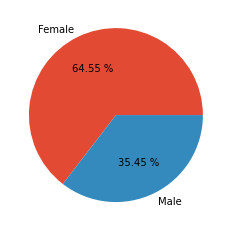

In [181]:
# Gender-
x = ((Films.Gender.value_counts()) / (Films.shape[0]) * 100).reset_index().set_index('index')
plt.pie(x.Gender,labels=x.index,autopct='%0.2f %%')
plt.show()


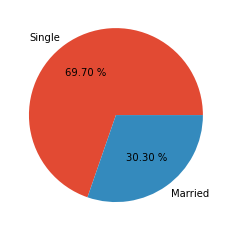

In [182]:
# Marital_Status-
y = ((Films.Marital_Status.value_counts()) / (Films.shape[0]) * 100).reset_index().set_index('index')
plt.pie(y.Marital_Status,labels=y.index,autopct= '%0.2f %%')
plt.show()

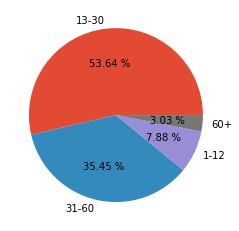

In [183]:
# Age-
z =(((Films.Age.value_counts())/(Films.shape[0])*100)).reset_index().set_index('index')
plt.pie(z.Age,labels=['13-30','31-60','1-12','60+'],autopct='%0.2f %%')
plt.show()

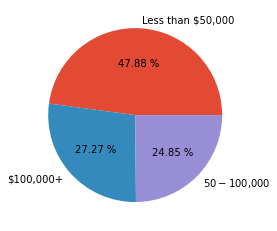

In [184]:
# income-
p =(((Films.Income.value_counts())/(Films.shape[0])*100)).reset_index().set_index('index')
plt.pie(p.Income,labels=['Less than $50,000','$100,000+','$50-$100,000'],autopct='%0.2f %%')
plt.show()

### In what media outlet(s) should the film series be advertised?

In [185]:
Films.Hear_About.value_counts().reset_index().iloc[0,0]

'5'